# Q1

In [ ]:
def Swap(a,b):
    return (b,a)

# 
a = 2
b = 3
print(a,b)
(a,b) = Swap(a,b)
print(a,b)

# Q2

In [ ]:
def Trace(A):
    N = len(A)
    T = 0
    for i in range(0,N):
        T += A[i][i]
    return T

A = [[1,2,3,4,5,6],[6,0,3,4,2,1],[2,1,9,4,6,7],[3,0,8,4,6,5],[1,5,4,3,3,1],[6,1,4,4,3,2]]
for row in A:
    print(row)
T = Trace(A)
print(T)

# Q3

In [ ]:
def Twins(N):
    if N == 1:
        S = -1
    else:
        S = (-1)**N*N + Twins(N-1)
    return S

# 
a = Twins(7)
print(a)

# Script 1

In [107]:
def Decompose(A):
    N = len(A)
    RN = range(0,N)   
    # NO NEED to compute firstly the three matrices C, D, E
    # compute T directly
    T = []
    for i in RN:
        row = []
        for j in RN:
            Sum = 0
            for k in RN:
                # if we had the matrices C, D and E we would have done
                #Sum += C[i][k]*D[k][j]+E[i][k]*D[k][j]
                # however the values of C[i][k], D[k][j] and E[i][k] would be zero ....
                c = 0
                d = 0
                e = 0
                # ... unless:
                if k == j: # we are on the diagonal for D
                    d = A[k][j]
                if i > k: # we are in the lower triangle for C
                    c = A[i][k]
                if i < k: # we are in the upper triangle for E
                    e = A[i][k]
                # in which cases: they would be the value in the corresponding position of A
                
                Sum += c*d+e*d
            row += [Sum]
        T += [row]
    return T

#
A = [[1,2,3,4,5,6],[6,0,3,4,2,1],[2,1,9,4,6,7],[3,0,8,4,6,5],[1,5,4,3,3,1],[6,1,4,4,3,2]]
for row in A:
    print(row)
print()
T = Decompose(A)
print()
for row in T:
    print(row)

[1, 2, 3, 4, 5, 6]
[6, 0, 3, 4, 2, 1]
[2, 1, 9, 4, 6, 7]
[3, 0, 8, 4, 6, 5]
[1, 5, 4, 3, 3, 1]
[6, 1, 4, 4, 3, 2]


[0, 0, 27, 16, 15, 12]
[6, 0, 27, 16, 6, 2]
[2, 0, 0, 16, 18, 14]
[3, 0, 72, 0, 18, 10]
[1, 0, 36, 12, 0, 2]
[6, 0, 36, 16, 9, 0]


# Script 2

number of bounces: 9


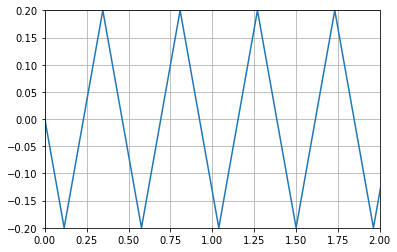

In [3]:
import math as mt
import matplotlib.pyplot as pl

# first step
L = 2
D = 0.4
theta = -60


theta = theta * mt.pi / 180
# find the length of the path
R = abs(0.5*D/mt.sin(theta))
# initial point
x = [0]
y = [0]
# first step
x += [R*mt.cos(theta) ]
y += [R*mt.sin(theta)]
bc = 1 # count the bouncing
while x[bc] < L:
    theta = - theta # alternate theta for up and downs
    x += [ x[bc]+2*R*mt.cos(theta) ]
    y += [ R*mt.sin(theta) ] 
    bc += 1

pl.plot(x,y)
pl.axis([0,L,-D/2,D/2])
pl.grid()
print('number of bounces: '+str(bc-1))


# Script 3 prep

In [72]:
import random as rn
x = []
N = 400
RN = range(0,N)
for i in RN:
    x += [rn.random()*10-3]

# sort 
for i in RN:
    Rj = range(i+1,N)
    for j in Rj:
        if x[i] > x[j]:
            (x[i],x[j]) = (x[j],x[i])

f = open('xaxis.txt','w')
for xp in x:
    f.write(str(xp)[:8]+'\n')
f.close()

# Script 3

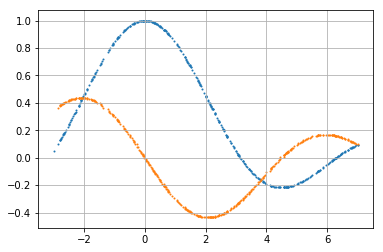

In [2]:
import math as mt
import matplotlib.pyplot as pl
# read in the file
f = open('xaxis.txt','r')
t = f.readlines()
f.close()
# extract the data
x = []
for item in t:
    x += [float(item.rstrip())]
# 
# evaluate the series
N = 10
y = []
for xp in x:
    yp = 0
    for n in range(0,N+1):
        yp += (-1)**n * xp**(2*n) / mt.factorial(2*n+1)
    y += [yp]
pl.scatter(x,y,s=1)
pl.grid()
# compute the derivative
Nx = len(x)
Rx = range(1,Nx-1)
dy = []
for i in Rx:
    dy += [(y[i+1]-y[i-1])/(x[i+1]-x[i-1])]
    
pl.scatter(x[1:Nx-1],dy,s=1)    